In [ ]:
# Strictly global neg FB
# - GAP is activated, is only cytosolic, active everywhere, quickly. 
# - Synchronous oscillation

# Strictly local neg FB
# - Patches are isulated from one another.
# - Cdc42-GEF complex converted to Cdc42-GEFi

# Hybrid neg FB
# - GEF phosphorylated but returns to cytosol. 
# - Sites are coupled through cytosol. 
# - Asynchronous oscillation

In [2]:
using DifferentialEquations
using ModelingToolkit
using LinearAlgebra
using Plots
using Colors
using Images
using Statistics
using Sundials

In [72]:
function run_ode(p,u0)
    min_prob = ODEProblem(rhosim,u0,(0.0,500),p)
    sol_simp = solve(min_prob,CVODE_BDF(linear_solver = :GMRES),saveat=1)
    return sol_simp
end

run_ode (generic function with 1 method)

In [61]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF - e*rhoGEF*PAK # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 
    du[3] = r2  #rhoGEF
    du[4] = -r2 #GEFc
    du[5] = r3
    du[6] = -r3
end

a = .01
b = .01
c = .002
d = .01
e = 0.05
f = .0004
g = .1
p = [a,b,c,d,e,f,g]
u0 = [1,100,1,10,1,100]

6-element Vector{Int64}:
   1
 100
   1
  10
   1
 100

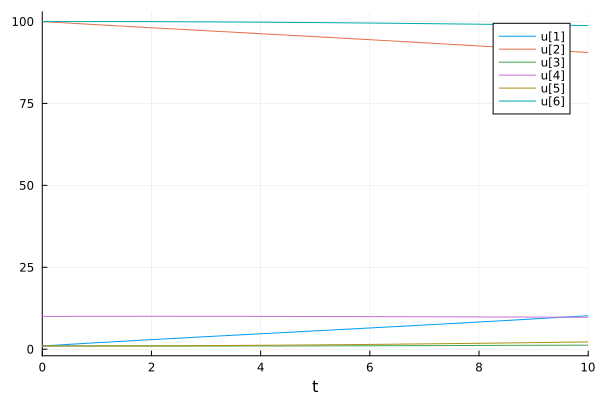

In [62]:
odesol = run_ode(p, u0)
plot(odesol)

In [ ]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .01
b = .01
c = .001
d = .01
e = 0.06
f = .0001
g = .007
h = .02
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,1,100,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   1
 100
   0

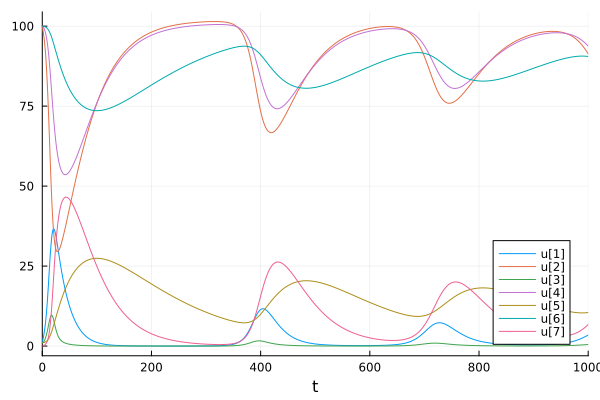

In [146]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

In [192]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .04
b = .04
c = .004
d = .04
e = 0.24
f = .0004
g = .028
h = .06
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,1,100,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   1
 100
   0

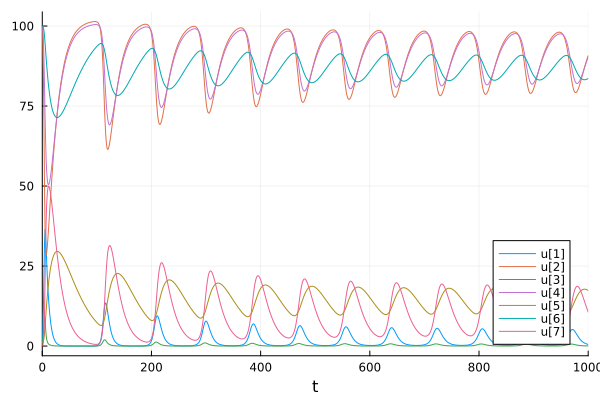

In [193]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

In [188]:
# ODEs
function rhosim(du,u,p,t)
    rhoT, rhoD, rhoGEF, GEFc, PAK, PAKc, rhoGEFi = u
    a, b, c, d, e, f, g = p
    r1 = (a*rhoGEF*rhoD) - b*rhoT 
    r2 = c*rhoT*GEFc - d*rhoGEF  # +1 rhoGEF, -1 rhoT, -1 GEFc
    r3 = f*PAKc*(rhoT+rhoGEF+rhoGEFi) - g*(PAK)
    du[1] = r1 - r2
    du[2] = -r1 + h*rhoGEFi
    du[3] = r2 - e*rhoGEF*PAK #rhoGEF
    du[4] = -r2 + h*rhoGEFi #GEFc
    du[5] = r3 #PAK
    du[6] = -r3 #PAKc
    du[7] = e*rhoGEF*PAK - h*rhoGEFi #RhoGEFi
end

a = .04
b = .04
c = .004
d = .04
e = 0.24
f = .0004
g = .028
h = .06
p = [a,b,c,d,e,f,g,h]
u0 = [1,100,1,100,0,0,0]

7-element Vector{Int64}:
   1
 100
   1
 100
   0
   0
   0

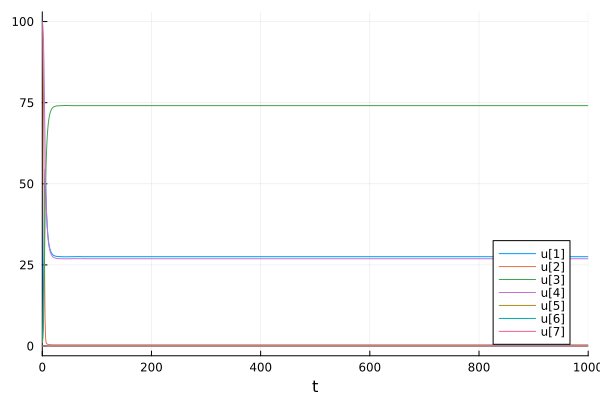

In [189]:
odesol = run_ode(p, u0)
plot(odesol, legend=:bottomright)

In [ ]:
function setup(r)
    # Generate constants
    N = 100
    SA = 4*pi*r^2
    V = (4/3)*pi*r^3
    mem_thickness = 0.01
    n = (mem_thickness * SA) / V

    Ax = Array(Tridiagonal([1.0 for i in 1:N-1],[-2.0 for i in 1:N],[1.0 for i in 1:N-1]))
    Ax[1,end] = 1.0
    Ax[end,1] = 1.0
    dx = (r*sqrt(pi))/N
    Ax = Ax/(dx^2) # adjust for 1/microns
    Ay = copy(Ax)

    r0 = zeros(100,100,4)
    Random.seed!(1)
    r0[:,:,1] .= 10 .*(rand.())   # Cdc42-GTPm
    r0[:,:,2] .= 0.5 - mean(r0[:,:,1])*n   # Cdc42-GDPm
    r0[:,:,3] .= 1
    r0[:,:,4] .= 10 .*(rand.())
    
    # Dummy parameters used only locally in fxn but passed to specify scope, or something..
    Ayt = zeros(N,N)
    tAx = zeros(N,N)
    D42t = zeros(N,N)
    D42d = zeros(N,N)
    Dpak = zeros(N,N)
    Dgef = zeros(N,N)
    R = zeros(N,N)
    dummy = (Ayt, tAx, D42t, D42d, Dpak, Dgef, R)
    # Actual parameters
    a = 1
    b = .1
    c = 1
    d = .03 #.05
    e = .04 #.07
    f = .05 #.2
    g = .02 # .1
    h = .01
    Dm = 0.01
    Dc = 10
    Dm2 = 0.1
    n = n

    p = (a, b, c, d, e, f, g, h, Dm, Dc, Dm2, n, Ax, Ay, dummy)
    return p, r0
end